In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [38]:
def plot_fibonacci_levels(data, high_col='High', low_col='Low', close_col='Close', date_col='Date', ax=None):
    
    # Ensure the date column is in datetime format
    data[date_col] = pd.to_datetime(data[date_col])
    data.set_index(date_col, inplace=True)
    
    # Calculate prominent high and low using a rolling window of 260 trading days (~1 year)
    high_1y = data[high_col].rolling(window=260).max() 
    low_1y = data[low_col].rolling(window=260).min()

    # Get the last available prominent high and low
    last_high = high_1y.iloc[-1]
    last_low = low_1y.iloc[-1]
    
    # Get the index of the last valid prominent high and low
    high_index = high_1y.last_valid_index()
    low_index = low_1y.last_valid_index()

    # Calculate Flevels
    diff = last_high - last_low
    levels = {
        'High': last_high,
        'F23.6': last_high - 0.236 * diff,
        'F38.2': last_high - 0.382 * diff,
        'F61.8': last_high - 0.618 * diff,
        'Low': last_low
    }

    # Calculate Fextensions
    extensions = {
        'F100': last_high + diff,
        'F127.8': last_high + 1.618 * diff
    }

    # Define colors for the Flevels and extensions
    colors = {
        'High': 'green',
        'F23.6': 'orange',
        'F38.2': 'blue',
        'F61.8': 'purple',
        'Low': 'red',
        'F100': 'cyan',
        'F127.8': 'magenta'
    }

    # Plotting
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    
    # Limit the x-axis to the dates of the highs and lows
    ax.set_xlim(data.index[0], data.index[-1])
    
    # Draw Flevels with colors
    for level_name, level in levels.items():
        ax.axhline(level, linestyle='--', linewidth=0.5, color=colors[level_name])
        ax.text(data.index[-1], level, f'{level_name}: {level:.2f}', color='black', fontsize=10,
                verticalalignment='center')

    # Draw Fextensions
    for ext_name, ext in extensions.items():
        ax.axhline(ext, linestyle='--', linewidth=0.5, color=colors[ext_name])
        ax.text(data.index[-1], ext, f'{ext_name}: {ext:.2f}', color='black', fontsize=10,
                verticalalignment='center')

    # Highlight the prominent high and low points
    if high_index is not None:
        ax.scatter(high_index, last_high, color='green', label='1Y High', zorder=5)
    if low_index is not None:
        ax.scatter(low_index, last_low, color='red', label='1Y Low', zorder=5)

    # Plot the closing price
    ax.plot(data.index, data[close_col], label='Closing Price', color='gray', linewidth=1.0)

    # Additional plot formatting
    ax.set_title('FLevels and Extensions Based on Prominent High/Low with Closing Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    plt.grid()

    plt.show()


[*********************100%%**********************]  1 of 1 completed


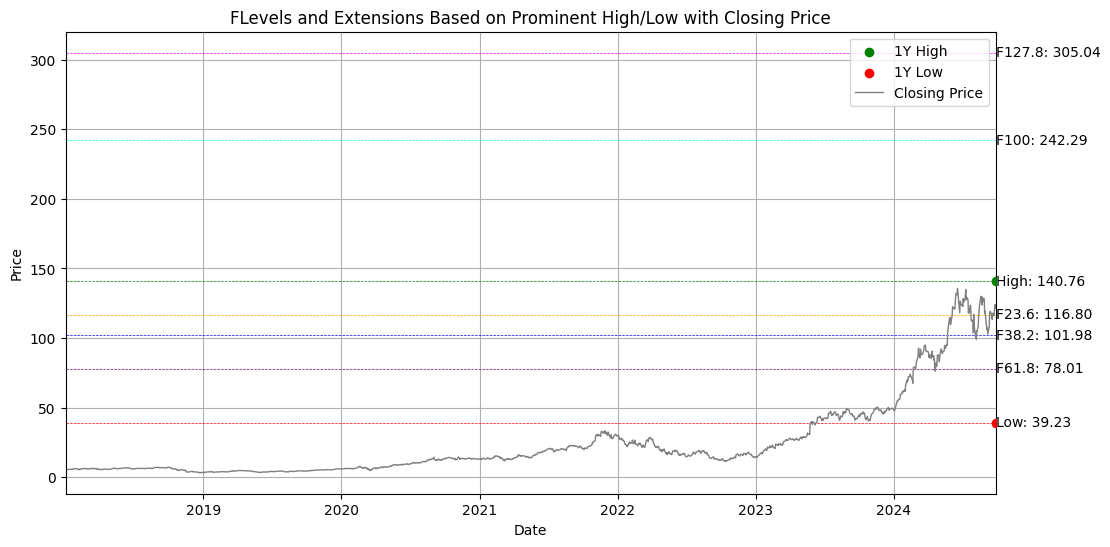

In [39]:
# Fetch TSLA data from Yahoo Finance
STOCK_TICKER = 'NVDA'
start_date = '2018-01-01'
current_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Download the data
df = yf.download(STOCK_TICKER, start=start_date, end=current_date)
df.reset_index(inplace=True)

# Call the function to plot Flevels and extensions
plot_fibonacci_levels(df)